#### Setting Up

In [179]:
# Running all blocks in one shot may cause long running time.
import pandas as pd
import numpy as np
import sklearn 
import sklearn.datasets
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold

In [180]:
#from google.colab import drive
#drive.mount('/content/drive')

In [181]:
df_train = pd.read_csv('/Users/patricia/Desktop/Y2S1/BT2103/Group Project/smoteTrain.csv')
df_test = pd.read_csv('/Users/patricia/Desktop/Y2S1/BT2103/Group Project/testSet.csv')

In [182]:
print(df_train.shape)
print(df_test.shape)

(35066, 20)
(7500, 20)


In [183]:
X_train = df_train.iloc[:,0:-1] # all the variables
y_train = df_train.iloc[:,-1] # labels

X_test = df_test.iloc[:,0:-1] # all the variables
y_test = df_test.iloc[:,-1] # labels

In [184]:
X_test

,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_4,PAY_6,BILL_AMT1,BILL_AMT3,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,FEMALE,MARRIED,SINGLE
0,0.353535,2,26,1,0,0,0,0.146519,0.086345,0.080648,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,1
1,0.070707,1,26,0,0,2,2,0.180299,0.109172,0.123547,0.003434,0.001187,0.001116,0.004026,0.002345,0.003783,1,0,1
2,0.090909,2,37,0,0,0,0,0.303994,0.094963,0.089876,0.003528,0.001201,0.001116,0.001610,0.001172,0.000567,1,0,1
3,0.494949,2,35,0,0,0,0,0.329900,0.237669,0.295304,0.022896,0.017912,0.006721,0.010266,0.011734,0.009458,0,0,1
4,0.010101,1,37,1,0,2,0,0.146419,0.092322,0.080405,0.001803,0.006531,0.000000,0.000000,0.000000,0.009647,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0.040404,2,33,1,2,2,2,0.182055,0.108506,0.122260,0.002404,0.000000,0.003794,0.000000,0.018287,0.000000,0,0,1
7496,0.232323,3,50,0,0,0,0,0.270609,0.157924,0.199684,0.005442,0.002893,0.005617,0.006770,0.010571,0.009475,0,1,0
7497,0.010101,3,41,0,0,0,0,0.147209,0.086747,0.081890,0.000000,0.000435,0.000335,0.001610,0.001172,0.001892,1,1,0
7498,0.020202,3,41,1,2,0,0,0.172815,0.102359,0.109631,0.000000,0.001187,0.002455,0.000000,0.002579,0.002081,1,1,0


In [170]:
# Helper method for visualing the accuracy
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In our dataset, we label 'defaulted' as positive (1) and 'non defaulted' as negative (0).

Across all notebooks, we will be implementing four evaualtion metrics. This is for us to have a guage on the model performance, regardless of real-world considerations. 


1. Accuracy
2. Recall
3. Precision
4. F1 Score

In addition, we are able to use a normalised confusion matrix, as our testing set has a class balance, thus allowing us to use the normalised values, since the number of both classes are similar

In general, however, we choose to focus on not only recall, but it's overall accuracy. Compared to loans, money drawn from credit cards are generally  of less amount, and are repaid faster. The parties involved in the credit card business profit from the credit card business from both the interest charged from overdue balances, as well as transaction fee charged as a percentage of the purchases made. 

Therefore, in evaulating the effectiveness of a credit card approval ML model, one must consider the recall of the model, so that the banks can reduce the considerable amount of losses incurred from defaulted credit cards, by identifiying the 'bad' customers. Furthermore, it is perhaps equally important that enough card are issued to the 'good' customers, so that the profitability of the banks and card issuers are maintained. As such, we consider both recall and accuracy in the evaulation of our model.

#### Logistic Regression

--------LR-------
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      5832
           1       0.47      0.57      0.51      1668

    accuracy                           0.76      7500
   macro avg       0.67      0.69      0.68      7500
weighted avg       0.78      0.76      0.77      7500

5709
Accuracy Score is 0.7612
Recall Score is 0.56655
Precision Score is 0.46945
F1 Score is 0.51345
      0     1
0  4764  1068
1   723   945
[[0.81687243 0.18312757]
 [0.43345324 0.56654676]]


/Users/patricia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


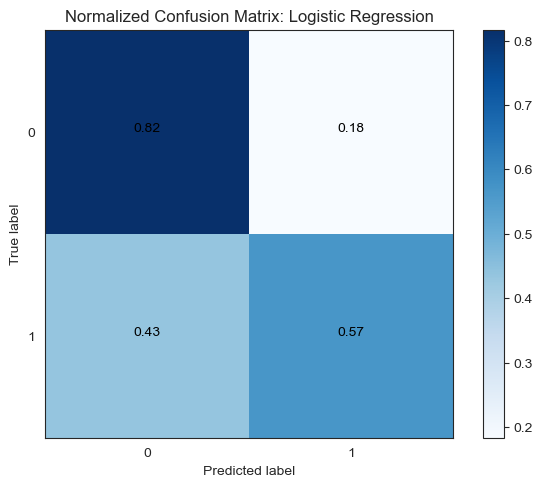

In [137]:
print("--------LR-------")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression(random_state=42,C=10)
model.fit(X_train, y_train)


y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))
print(sum(y_predict == y_test))
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict))) # bad recall...
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))

print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Logistic Regression')

##### Bias Variance trade off

In [ ]:
# Let's plot the bias variance plot to see 
# Can take up to 10 mins
import sklearn
import autograd.numpy as grad_np

n_iterations = 30 # Number of iterations used to calculate the average losses, set this high to have smooth plot
max_points = 200
 # Number of points in the training set, set this high to extend x-axis

training_losses = grad_np.zeros(max_points)
expected_losses = grad_np.zeros(max_points)
eps = 1e-10


# Using:
# X_train
# y_train
# X_test
# y_test


for num_points in range(10, max_points+1):
  
    training_loss = 0.0
    expected_loss = 0.0

    for i in range(n_iterations):
        # generate random samples for training
        sample_x = X_train.sample(num_points)
        sample_y = y_train[sample_x.index]

        model = LogisticRegression()
        model.fit(sample_x, sample_y)

        training_loss += sklearn.metrics.log_loss(y_true = sample_y, y_pred = np.clip(model.predict_proba(sample_x),eps,1-eps))
        expected_loss += sklearn.metrics.log_loss(y_true = y_test, y_pred = np.clip(model.predict_proba(X_test),eps,1-eps))
    training_losses[num_points - 1] = training_loss / n_iterations
    expected_losses[num_points - 1] = expected_loss / n_iterations

In [ ]:
fig, ax = plt.subplots()

plt.style.use('seaborn-white')
plt.xlim(10, max_points + 1)
plt.ylim(0, 5)
plt.xlabel('Number of Training Examples')
plt.ylabel('Loss')
plt.rcParams['figure.figsize'] = [10, 8]
plt.plot(range(1, max_points + 1), training_losses, 'r', label='Training Loss')
plt.plot(range(1, max_points + 1), expected_losses, 'b', label='Expected Loss')
ax.fill_between(range(1, max_points + 1), 0.685, expected_losses, facecolor='blue', alpha=0.2)
ax.fill_between(range(1, max_points + 1), 0.685, training_losses, facecolor='red', alpha=0.2)
plt.legend()
plt.show()
#training_losses

##### ROC curve

In [ ]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

model = LogisticRegression()
model.fit(X_train, y_train)

# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


It seems logistic regression performs very badly on this dataset. We suspect that this is because the data are not linearly seperable.
Now we shall investigate using random forest and decision tree based models.

#### Decision Tree

--------Decision Tree--------
              precision    recall  f1-score   support

           0       0.83      0.73      0.78      5832
           1       0.34      0.49      0.40      1668

    accuracy                           0.67      7500
   macro avg       0.59      0.61      0.59      7500
weighted avg       0.72      0.67      0.69      7500

5054
Accuracy Score is 0.67387
Recall Score is 0.48921
Precision Score is 0.33859
F1 Score is 0.4002
      0     1
0  4238  1594
1   852   816
[[0.72668038 0.27331962]
 [0.51079137 0.48920863]]


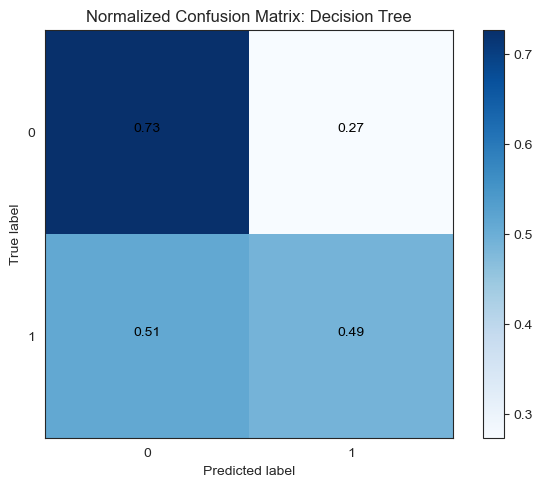

In [67]:
print("--------Decision Tree--------")
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 42)

model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))
print(sum(y_predict == y_test))
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Decision Tree')

In [ ]:
# Decision Tree Tuning
!pip install optuna
# gridsearchCV is too slow

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import optuna
import numpy as np


def objective(trial):
  params_grid = {
      "min_samples_leaf" : trial.suggest_int("min_samples_leaf", 1, 9),
      "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
      "max_depth": trial.suggest_int("max_depth", 5, 50),
      "criterion": trial.suggest_categorical("criterion", ["gini", "entropy"])
  }
  model = DecisionTreeClassifier(random_state = 42, **params_grid)
  score = cross_val_score(model, X_train, y_train, cv = 10).mean()
  return score


search_space = {"criterion": ["gini", "entropy"],
                "max_depth": np.arange(start=5, stop=50, step=2).tolist(), 
                "min_samples_leaf": np.arange(start=1, stop=10, step=2).tolist(), 
                "min_samples_split": np.arange(start=2, stop=11, step=2).tolist()
                }
                

In [ ]:
study = optuna.create_study(direction = "maximize", sampler=optuna.samplers.GridSampler(search_space))
study.optimize(objective,n_trials = 100)
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}= {}, ".format(key, value))

5561
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      5832
           1       0.43      0.52      0.47      1668

    accuracy                           0.74      7500
   macro avg       0.64      0.66      0.65      7500
weighted avg       0.76      0.74      0.75      7500

Accuracy Score is 0.74147
Recall Score is 0.51799
Precision Score is 0.43222
F1 Score is 0.47123
      0     1
0  4697  1135
1   804   864
[[0.80538409 0.19461591]
 [0.48201439 0.51798561]]


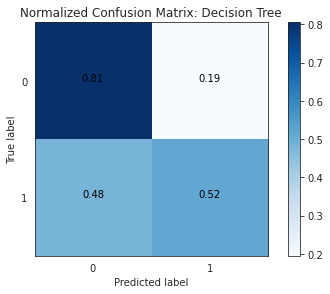

In [121]:
# Tuned DT


model = DecisionTreeClassifier(random_state = 42,
  min_samples_leaf= 1, 
  min_samples_split= 4,
  max_depth= 13, 
  criterion= "gini")

model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(sum(y_predict == y_test))
print(classification_report(y_test, y_predict))
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Decision Tree')

In [ ]:
optuna.visualization.plot_param_importances(study)

#### Random Forest

--------RF--------
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      5832
           1       0.52      0.49      0.50      1668

    accuracy                           0.79      7500
   macro avg       0.69      0.68      0.68      7500
weighted avg       0.78      0.79      0.78      7500

5900
Accuracy Score is 0.78667
Recall Score is 0.48561
Precision Score is 0.52191
F1 Score is 0.50311
      0    1
0  5090  742
1   858  810
[[0.87277092 0.12722908]
 [0.51438849 0.48561151]]


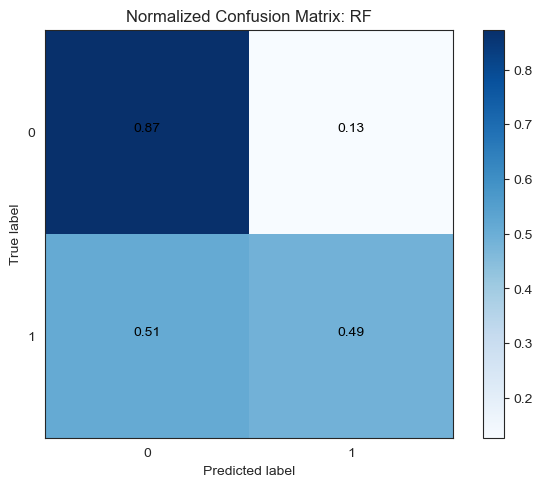

In [54]:
print("--------RF--------")
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)


y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))
print(sum(y_predict == y_test))
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: RF')

In [ ]:
from sklearn.model_selection import cross_val_score
import optuna
def objective(trial):
  params_grid = {
      "n_estimators" : trial.suggest_int("n_estimators",1, 100),
      "max_depth" : trial.suggest_int("max_depth", 5, 50),
      "min_samples_split": trial.suggest_int("min_sample_split", 2, 15),
      "min_samples_leaf": trial.suggest_int("min_sample_leaf", 1, 60),
      "max_features": trial.suggest_categorical("max_festures", ["auto", "sqrt"])
  }
  model = RandomForestClassifier(random_state = 42, **params_grid)
  score = cross_val_score(model, X_train, y_train, cv = 10).mean()
  return score

#
study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 100)
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}= {}, ".format(key, value))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      5832
           1       0.52      0.54      0.53      1668

    accuracy                           0.79      7500
   macro avg       0.69      0.70      0.70      7500
weighted avg       0.79      0.79      0.79      7500

5896
Accuracy Score is 0.78613
Recall Score is 0.54317
Precision Score is 0.51831
F1 Score is 0.53044
      0    1
0  4990  842
1   762  906
[[0.85562414 0.14437586]
 [0.45683453 0.54316547]]


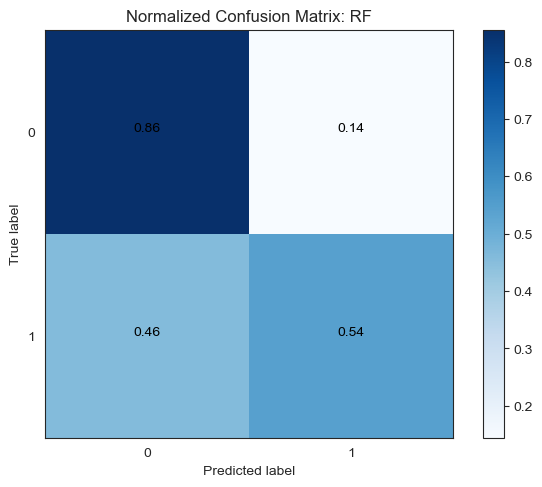

In [65]:
# Tuned RF
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42, n_estimators = 50, 
  max_depth= 6, 
  min_samples_split= 10, 
  min_samples_leaf = 1,
  max_features = "sqrt")
model.fit(X_train, y_train)


y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))
print(sum(y_predict == y_test))
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: RF')

#### LightGBM

In [ ]:
print("--------LGBM--------")
import lightgbm as lgb
model = lgb.LGBMClassifier(objective="binary",random_state = 42)
model.fit(X_train, y_train)


y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))
print(sum(y_predict == y_test))
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['0','1'] 
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: LGBM')

In [ ]:
import lightgbm as lgb
def objective(trial):
  param_grid = {
        "boosting_type": trial.suggest_categorical("boosting_type", ["goss", "dart", "gbdt"]),
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.5),
        "num_leaves": trial.suggest_int("num_leaves", 20, 2000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 1000, step=100),
        "max_bin": trial.suggest_int("max_bin", 200, 300),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.9, step=0.1
        ),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.9, step=0.1
        ),
  }
  model = lgb.LGBMClassifier(objective="binary", **param_grid, random_state = 42)
  score = cross_val_score(model, X_train, y_train, cv = 5).mean()
  return score

In [ ]:




study = optuna.create_study(direction = "maximize")

# starting point for tuning
study.enqueue_trial(params={"objective":"binary",
  "boosting_type": "dart", 
  "n_estimators": 383, 
  "learning_rate":0.487313377563663, 
  "num_leaves": 1340, 
  "max_depth":10, 
  "min_data_in_leaf": 800, 
  "max_bin": 240, 
  "lambda_l1": 10, 
  "lambda_l2": 5, 
  "min_gain_to_split": 0.009771531733810842, 
  "bagging_fraction": 0.4, 
  "feature_fraction": 0.8
  })

study.optimize(objective, n_trials = 100)
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}= {}, ".format(key, value))

In [ ]:

model = lgb.LGBMClassifier(random_state = 42,boosting_type= 'dart', 
  n_estimators= 491, 
  learning_rate= 0.24033143723235, 
  num_leaves= 1220, 
  max_depth= 11, 
  min_data_in_leaf= 200, 
  max_bin= 262, 
  lambda_l1= 0, 
  lambda_l2= 0, 
  min_gain_to_split= 0.30442714239075985, 
  bagging_fraction= 0.7, 
  feature_fraction= 0.7)
model.fit(X_train, y_train)


y_predict = model.predict(X_test)
print(sum(y_predict == y_test))
print(classification_report(y_test, y_predict))
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: LGBM')


### SVM

5923
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      5832
           1       0.53      0.49      0.51      1668

    accuracy                           0.79      7500
   macro avg       0.69      0.68      0.69      7500
weighted avg       0.78      0.79      0.79      7500

Accuracy Score is 0.78973
Recall Score is 0.48741
Precision Score is 0.52964
F1 Score is 0.50765
[[0.87620027 0.12379973]
 [0.51258993 0.48741007]]
      0    1
0  5110  722
1   855  813


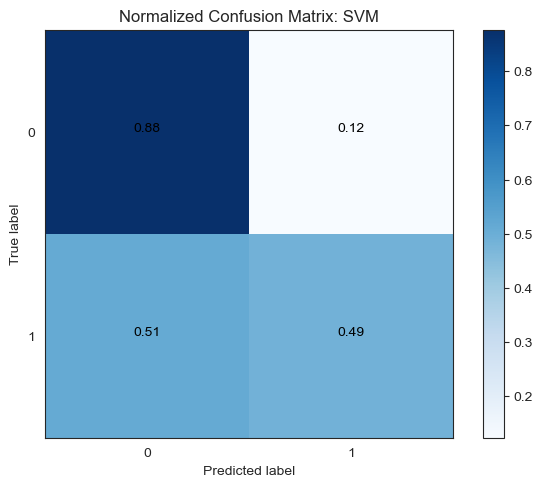

In [66]:
from sklearn.svm import SVC
model = SVC(random_state=42)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(sum(y_predict == y_test))
print(classification_report(y_test, y_predict))
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: SVM')
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

In [ ]:
from sklearn.model_selection import GridSearchCV
param_space = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}


clf = GridSearchCV(model, param_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))




In [ ]:
clf_svm = SVC(random_state=42,C=10,kernel='rbf',gamma=1)
clf_svm.fit(X_train, y_train)
y_predict = clf_svm.predict(X_test)
print(sum(y_predict == y_test))
print(classification_report(y_test, y_predict))
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: SVM')

### kNN

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      5832
           1       0.39      0.39      0.39      1668

    accuracy                           0.73      7500
   macro avg       0.61      0.61      0.61      7500
weighted avg       0.73      0.73      0.73      7500

5450
Accuracy Score is 0.72667
Recall Score is 0.38969
Precision Score is 0.38644
F1 Score is 0.38806
[[0.82304527 0.17695473]
 [0.61031175 0.38968825]]


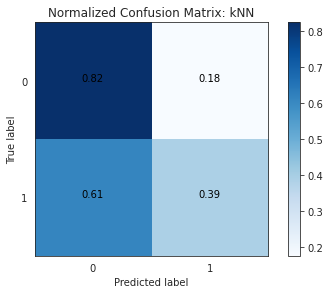

In [157]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

print(classification_report(y_test, y_predict))
print(sum(y_predict == y_test))
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: kNN')

In [129]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

#def show_best_model(support_array, columns, model):
#    y_pred = model.predict(X_test.iloc[:, support_array])
#    r2 = r2_score(y_test, y_predict)
#    n = len(y_pred) #size of test set
#    p = len(model.coef_) #number of features
#    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
#    print('Adjusted R-squared: %.2f' % adjusted_r2)
#    j = 0;
#    for i in range(len(support_array)):
#        if support_array[i] == True:
#            print(columns[i], model.coef_[j])
#            j +=1


logreg = LogisticRegression()

for i in range(3,5):
    sfs = RFE(logreg, n_features_to_select = i, step=1) 
    sfs.fit(X_train, y_train)
    #if i<11:
    #    show_best_model(sfs.support_, X_train.columns, sfs.estimator_)
    y_predict = sfs.predict(X_test.copy())
    r2 = r2_score(y_test, y_predict)
    print(r2)
    sfs.inverse_transform(X_test.copy())
    

#logreg = LogisticRegression()()
#logreg.fit(X_train, y_train)
#y_predict = logreg.predict(X_test)
#print('R-squared: %.2f' % r2_score(y_test, y_pred))


#selector = RFE(regr, 5, step=1)
#selector.fit(x_train, y_train)
#show_best_model(selector.support_, x_train.columns, selector.estimator_)



/Users/patricia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/patricia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

-2.2204174931659613


ValueError: X has a different shape than during fitting.

In [178]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

#for i in range(3,10):
logreg = kNearestNeighbors()
sfs = SequentialFeatureSelector(logreg, n_features_to_select=10, direction="forward")
sfs.fit(X_train, y_train)
print("Features selected by forward sequential selection: "f"{feature_names[sfs.get_support()]}")

X_train_trans = X_train.iloc[sfs.get_support()]
X_test_trans = X_test.iloc[sfs.get_support()]

model = LogisticRegression().fit(X_train_trans, y_train)
y_predict = model.predict(X_test_trans)
r2 = r2_score(y_test, y_predict)
print(r2)

/Users/patricia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/patricia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/patricia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/patricia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/patricia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/patricia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Features selected by forward sequential selection: ['LIMIT_BAL' 'EDUCATION' 'PAY_0' 'PAY_2' 'PAY_4' 'PAY_AMT1' 'PAY_AMT2'
 'PAY_AMT4' 'PAY_AMT5' 'PAY_AMT6']


IndexError: Boolean index has wrong length: 19 instead of 35066

In [186]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

logreg = LogisticRegression() 
sfs = SFS(logreg, 
           k_features=10, 
           forward=True, # if forward = True then SFS otherwise SBS
           floating=False, 
           verbose=2,
           scoring='accuracy'
           )
sfs.fit(X_train, y_train)
sfs.k_feature_names_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished

[2022-11-15 02:41:44] Features: 1/10 -- score: 0.6763244731331373[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    2.0s finished

[2022-11-15 02:41:46] Features: 2/10 -- score: 0.6866478446419377[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    2.3s finished

[2022-11-15 02:41:48] Features: 3/10 -- score: 0.6892145716104814[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

/Users/patricia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/patricia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/patricia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/patricia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

('LIMIT_BAL',
 'EDUCATION',
 'PAY_0',
 'PAY_2',
 'PAY_4',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6')

In [188]:
list(sfs.k_feature_idx_)
classifier = LogisticRegression()
classifier.fit(X_train.iloc[:,list(sfs.k_feature_idx_)], y_train)

y_predict = classifier.predict(X_test.iloc[:,list(sfs.k_feature_idx_)])

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      5832
           1       0.49      0.55      0.52      1668

    accuracy                           0.77      7500
   macro avg       0.68      0.69      0.68      7500
weighted avg       0.78      0.77      0.78      7500



/Users/patricia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Naive Bayes

              precision    recall  f1-score   support

           0       0.88      0.30      0.45      5832
           1       0.26      0.86      0.40      1668

    accuracy                           0.43      7500
   macro avg       0.57      0.58      0.42      7500
weighted avg       0.75      0.43      0.44      7500

3194
Accuracy Score is 0.42587
Recall Score is 0.86151
Precision Score is 0.2607
F1 Score is 0.40028
[[0.30126886 0.69873114]
 [0.13848921 0.86151079]]


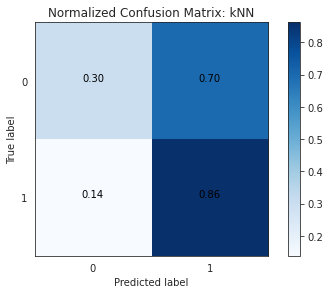

In [168]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

#Train the model using the training sets
model.fit(X_train, y_train)

#Predict the response for test dataset
y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))
print(sum(y_predict == y_test))
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: kNN')




In [197]:
#model.theta_
#model.var_
#join(model.theta_)
array = X_train.columns.values
df = pd.DataFrame(array, columns = ['feature'])
df2 = pd.DataFrame(model.theta_).transpose()
df.join(df2).transpose().iloc[14:19]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18


### Multi Layer Perceptron

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      5832
           1       0.49      0.54      0.51      1668

    accuracy                           0.77      7500
   macro avg       0.68      0.69      0.68      7500
weighted avg       0.78      0.77      0.78      7500

Accuracy Score is 0.7728
Recall Score is 0.53837
Precision Score is 0.49017
F1 Score is 0.51314
[[0.83984911 0.16015089]
 [0.4616307  0.5383693 ]]


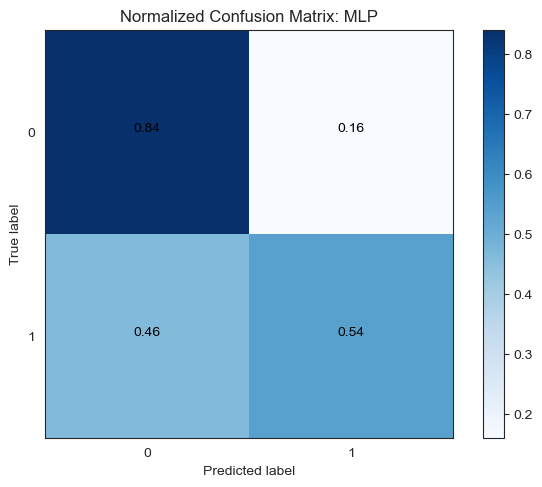

In [53]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(20), max_iter=300,activation = 'relu',solver='sgd',random_state=1)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))

sns.set_style('white') 
class_names = ['0','1'] 
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: MLP')

In [ ]:
model = MLPClassifier(max_iter=300,random_state=1)

parameter_space = {
    'hidden_layer_sizes': [(10,25,50), (25,50,100), (10,50,100),(20,20,20),(100,50,20)], # each tuple is one construct...
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

### Explainable AI
### --- LIME

We know that in a trained linear model, each feature x is given a weight. It is obvious that a feature with high value of weight must have more importance in predicting the output.

This observation is easy to be made in a linear model, but when it comes to a more complicated model, (like for example, random forest; lightGBM or MLP), it become not so straight forward.

LIME (Local Interpretable Model-agnostic Explanations) helps to illuminate a machine learning model and to make its predictions individually comprehensible.
It does so by training an explainer model (that is linear), that aims to fit our predictor(the model trained). And we can then use weights from this explainer linear model to make claims about the importance of each feature.

In [ ]:
#!pip install shap
#!pip install interpret
#!pip install pytorch-tabnet

from lightgbm import LGBMClassifier
from interpret.blackbox import LimeTabular
from interpret import show

tuned_lgbm = LGBMClassifier(objective="binary",
  boosting_type= 'goss', 
  n_estimators= 475, 
  learning_rate= 0.4216019018804637, 
  num_leaves= 80, 
  max_depth= 8, 
  min_data_in_leaf= 300, 
  max_bin= 212, 
  lambda_l1= 5, 
  lambda_l2= 15, 
  min_gain_to_split= 0.3649078734086275, 
  bagging_fraction= 0.30000000000000004, 
  feature_fraction= 0.8, 
  random_state=42
  )


tuned_lgbm.fit(X_train, y_train)
y_predict = tuned_lgbm.predict(X_test)


X_test.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

lime = LimeTabular(predict_fn=tuned_lgbm.predict_proba, 
                   data=X_train, 
                   random_state=42)
# Get local explanations
# The index 10933 and 10943 are chosen because there's 5 instances of status 1 and 5 instances of status 0 inside.
lime_local = lime.explain_local(X_test[10933:10943], 
                                y_test[10933:10943], 
                                name='LIME')


show(lime_local)

We can also use the feature importance provided by sklearn

In [ ]:
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result


features = ['LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','MALE','FEMALE','MARRIED','SINGLE','OTHERS']
classifier = RandomForestClassifier(random_state = 42)

classifier.fit(X_train, y_train)

get_feature_importance(classifier, features)

sort = classifier.feature_importances_.argsort()
plt.barh(features, classifier.feature_importances_[sort])
plt.xlabel("Feature Importance")